## Lab 5 - Categorization

This lab must be done **individually**. The required packages have been imported for you below.

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import spatial  
from sklearn.model_selection import LeaveOneOut

Data adapted from Leuven Concept Database (De Deyne et al., 2008).

Extract data from file.

In [47]:
df = pd.read_csv('data-categorization.csv')

Get feature list.

In [48]:
features = list(df.features)
features.remove('category')

Get names of all animals.

In [49]:
names = list(df); del names[0]

Get binary feature matrix (animal-by-feature).

In [50]:
F = pd.read_csv("data-categorization.csv", header=0, usecols=list(np.arange(1,54)))
F = np.asarray(F)

Get category labels.

In [51]:
labels = F[len(F)-1,:]

Config `F` such that each row is feature vector of one animal.

Each column is either a bird (category label = 0) or a fish (category label = 1).

In [52]:
F = np.delete(F,len(F)-1,0) 
F = np.transpose(F)
#Each column is either a bird (category label = 0) or a fish (category label = 1).
#Each row is a feature vector of one animal
#Row = animal representation, Column = feature vector, element = feature vector of animal rated by "bird" or "fish"

In [53]:
print(names)

['eagle', 'dove', 'duck', 'magpie', 'pheasant', 'vulture', 'rooster', 'turkey', 'canary', 'chicken', 'cuckoo', 'crow', 'chickadee', 'seagull', 'blackbird', 'sparrow', 'stork', 'parrot', 'parakeet', 'peacock', 'pelican', 'penguin', 'heron', 'robin', 'woodpecker', 'ostrich', 'owl', 'falcon', 'swan', 'swallow', 'anchovy', 'dolphin', 'trout', 'goldfish', 'shark', 'herring', 'squid', 'cod', 'carp', 'orca', 'eel', 'piranha', 'plaice', 'flatfish', 'sperm whale', 'ray', 'sardine', 'pike', 'stickleback', 'sole', 'whale', 'salmon', 'swordfish']


You should have the following variables:

(**Hint**: Print them out to see what they are).

1. Main variables you'll need for analysis:
    - `F`:        53-by-44 binary matrix, i.e. 53 animal exemplars (30 birds and 23 fish) and 44 features
    - `labels`:   53 binary category labels (0 for bird; 1 for fish), i.e. ground truth that you'll predict
    
    
2. Auxillary variables
    - `names`:    53 animal names
    - `features`: 44 feature names
    
In this lab, you will implement, evaluate, and analyze two models of categorization, based on the prototype and exemplar theories. You will test these models against a dataset of birds and fish, features and category labels of which have been provided in the matrix and array processed for you (see above). 

You will first be guided through a non-assessed visualization, via multi-dimensional scaling (MDS)---this will offer you an intuition of the data you work with in a 2D space. You will then implement each of the two models, evaluate them in leave-one-out-cross-validation (as discussed in class), and interpret the errors made by each model.

### Data visualization (not assessed)

Run the code below to visualize the animals in two dimensions, via multi-dimensional scaling.

Text(0, 0.5, 'Dimension 2')

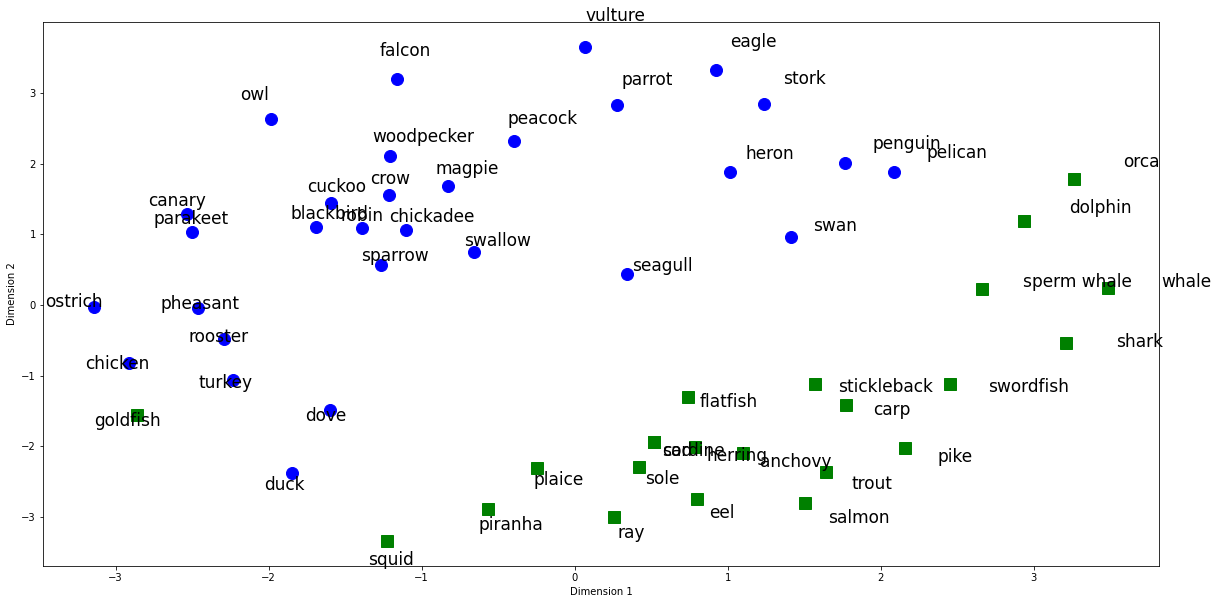

In [54]:
from sklearn.manifold import MDS

embedding = MDS(n_components=2)
F_lowdim = embedding.fit_transform(F)

birdinds = np.where(labels==0)
fishinds = np.where(labels==1)

fig = plt.figure(figsize=(20, 10))
plt.plot(F_lowdim[birdinds,0],F_lowdim[birdinds,1],'bo',markersize=12)
plt.plot(F_lowdim[fishinds,0],F_lowdim[fishinds,1],'gs',markersize=12)

for i in range(0,len(F)):
    plt.text(F_lowdim[i,0]*1.1,F_lowdim[i,1]*1.1,names[i],fontsize=17)
    
plt.xlabel('Dimension 1')    
plt.ylabel('Dimension 2')    

# plt.show()

### Tasks 1-3 [10 pts] 
**Task 1**: Evaluate each model by standard leave-one-animal-out cross validation. **[2 pts]**

**Task 2**: Implement two models of categorization: a prototype model **[2pts]** and an exemplar model **[2pts]**.

**Task 3**: Report predictive accuracy of each model in percentage (i.e. % correct predictions out of 53 animals). **[1 pt]**

**Task 4**: Perform an error analysis on the two models (i.e. report which exemplars each model failed on), then compare and discuss why the errors look the way they do. **[3 pts]**


**Hint:** Consider using the following wrapper code for performing the leave-one-out (LOO) cross validation.

You may also want to refer to description and example code here: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [55]:
loo = LeaveOneOut()
fold = loo.get_n_splits(F) #53 data points, corresponding to each animal.
prototype_pred = []
exemplar_pred = []
#

for train_index, test_index in loo.split(F):
#     ...... your code here ......
    dist = []
#     1) Get training and testing data points
    X_train, x_test = F[train_index], F[test_index] 
    y_train, y_test = labels[train_index], labels[test_index]
    X_test = [] #Make X_test a vector instead of a nested list, as the split function was doing for some reason.
    for i in x_test:
        for j in i:
            X_test.append(j)
            
#     2.1) Implement and predict with prototype model
    """Prototype Model: find prototype for birds and fish categories from X_train, 
    and compute euclidean distance of each prototype to X_test data point. 
    If distance from bird category is greater than fish category, classify X_test as fish and vice-versa, etc."""
    birds = []
    fishes = []
    for i in range(len(y_train)):
        if y_train[i] == 0: #bird
            birds.append(X_train[i])
        elif y_train[i] == 1:
            fishes.append(X_train[i])
    bird_prototype = np.mean(birds, 0)
    fishes_prototype = np.mean(fishes, 0)
    if spatial.distance.euclidean(bird_prototype, X_test) > spatial.distance.euclidean(fishes_prototype, X_test):
        prototype_pred.append(1)
    else:
        prototype_pred.append(0)
        
    """prototype.fit(X_train, y_train)
    yhat = prototype.pred(X_test, y_test)
    prototype_pred.append(yhat)"""
       
#     2.2) Implement and predict with exemplar model
    """Exemplar Model: compute distance of each category in X_train with similarity function to X_test. """
    """exemplar.fit(X_train, y_train)
    yhat = exemplar.pred(X_test, y_test)
    exemplar_pred.append(yhat)"""
    birds_exemplar = []
    fishes_exemplar = []
    for i in range(len(birds)):
        birds_exemplar.append(spatial.distance.euclidean(birds[i], X_test))
    for j in range(len(fishes)):
        fishes_exemplar.append(spatial.distance.euclidean(fishes[j], X_test))
    if np.exp(-1*np.sum(birds_exemplar)) > np.exp(-1*np.sum(fishes_exemplar)):
        exemplar_pred.append(0)
    else:
        exemplar_pred.append(1)


# 3) Report predictive accuracies (%)
prototype_acc = 0
exemplar_acc = 0
for i in range(len(prototype_pred)):
    if prototype_pred[i] == labels[i]:
        prototype_acc += 1
        
for i in range(len(exemplar_pred)):
    if exemplar_pred[i] == labels[i]:
        exemplar_acc += 1
        
prototype_acc = (prototype_acc/len(prototype_pred))*100
exemplar_acc = (exemplar_acc/len(exemplar_pred))*100
print("Prototype model accuracy: ", prototype_acc, "%")
print("Exemplar model accuracy: ", exemplar_acc, "%")


Prototype model accuracy:  94.33962264150944 %
Exemplar model accuracy:  69.81132075471697 %


Export and submit a **fully executable** Python Jupyter Notebook and a PDF copy of your notebook showing all results. 

In [56]:
#Error Analysis
exemplar_fail =[]
prototype_fail = []
for i in range(len(exemplar_pred)):
    if exemplar_pred[i] != labels[i]:
        exemplar_fail.append(names[i])
        
for i in range(len(prototype_pred)):
    if prototype_pred[i] != labels[i]:
        prototype_fail.append(names[i])      

print("Exemplar model failures:", exemplar_fail)
print("Prototype model failures:",prototype_fail)

Exemplar model failures: ['eagle', 'dove', 'duck', 'pheasant', 'vulture', 'rooster', 'turkey', 'chicken', 'seagull', 'parrot', 'pelican', 'penguin', 'heron', 'ostrich', 'falcon', 'swan']
Prototype model failures: ['duck', 'goldfish', 'orca']


The prototype model performed much better than the exemplar model.

The exemplar model classified all fishes correctly and only misclassified birds.

The prototype model misclassified two fishes (goldfish, orca) and one bird (duck).

The prototype model only misclassified 3 animals probably because, despite the data points being far from each other as shown on the given 2D graph, the prototype created from all data points was relatively stable, allowing for more accurate predictions. However since the data points were far away from each other, the exemplar model prescribed inaccurate weights to the more extreme data points, resulting in greater inaccuracy. 

The problems with both models could have to do with overall ambiguity of features selected to rate each animal with; the exemplar model classified more birds wrongly because some of their features overlapped too closely with the fishes category (eg. can swim would be rated positively for all fishes but only for some birds, so many birds that can swim (duck, seagull, pelican, penguin, swan, heron) have been misclassified as fishes by the exemplar model).
 